clients: 
    modelstates_ema
    Carnation_model_step.csv
    modelstates



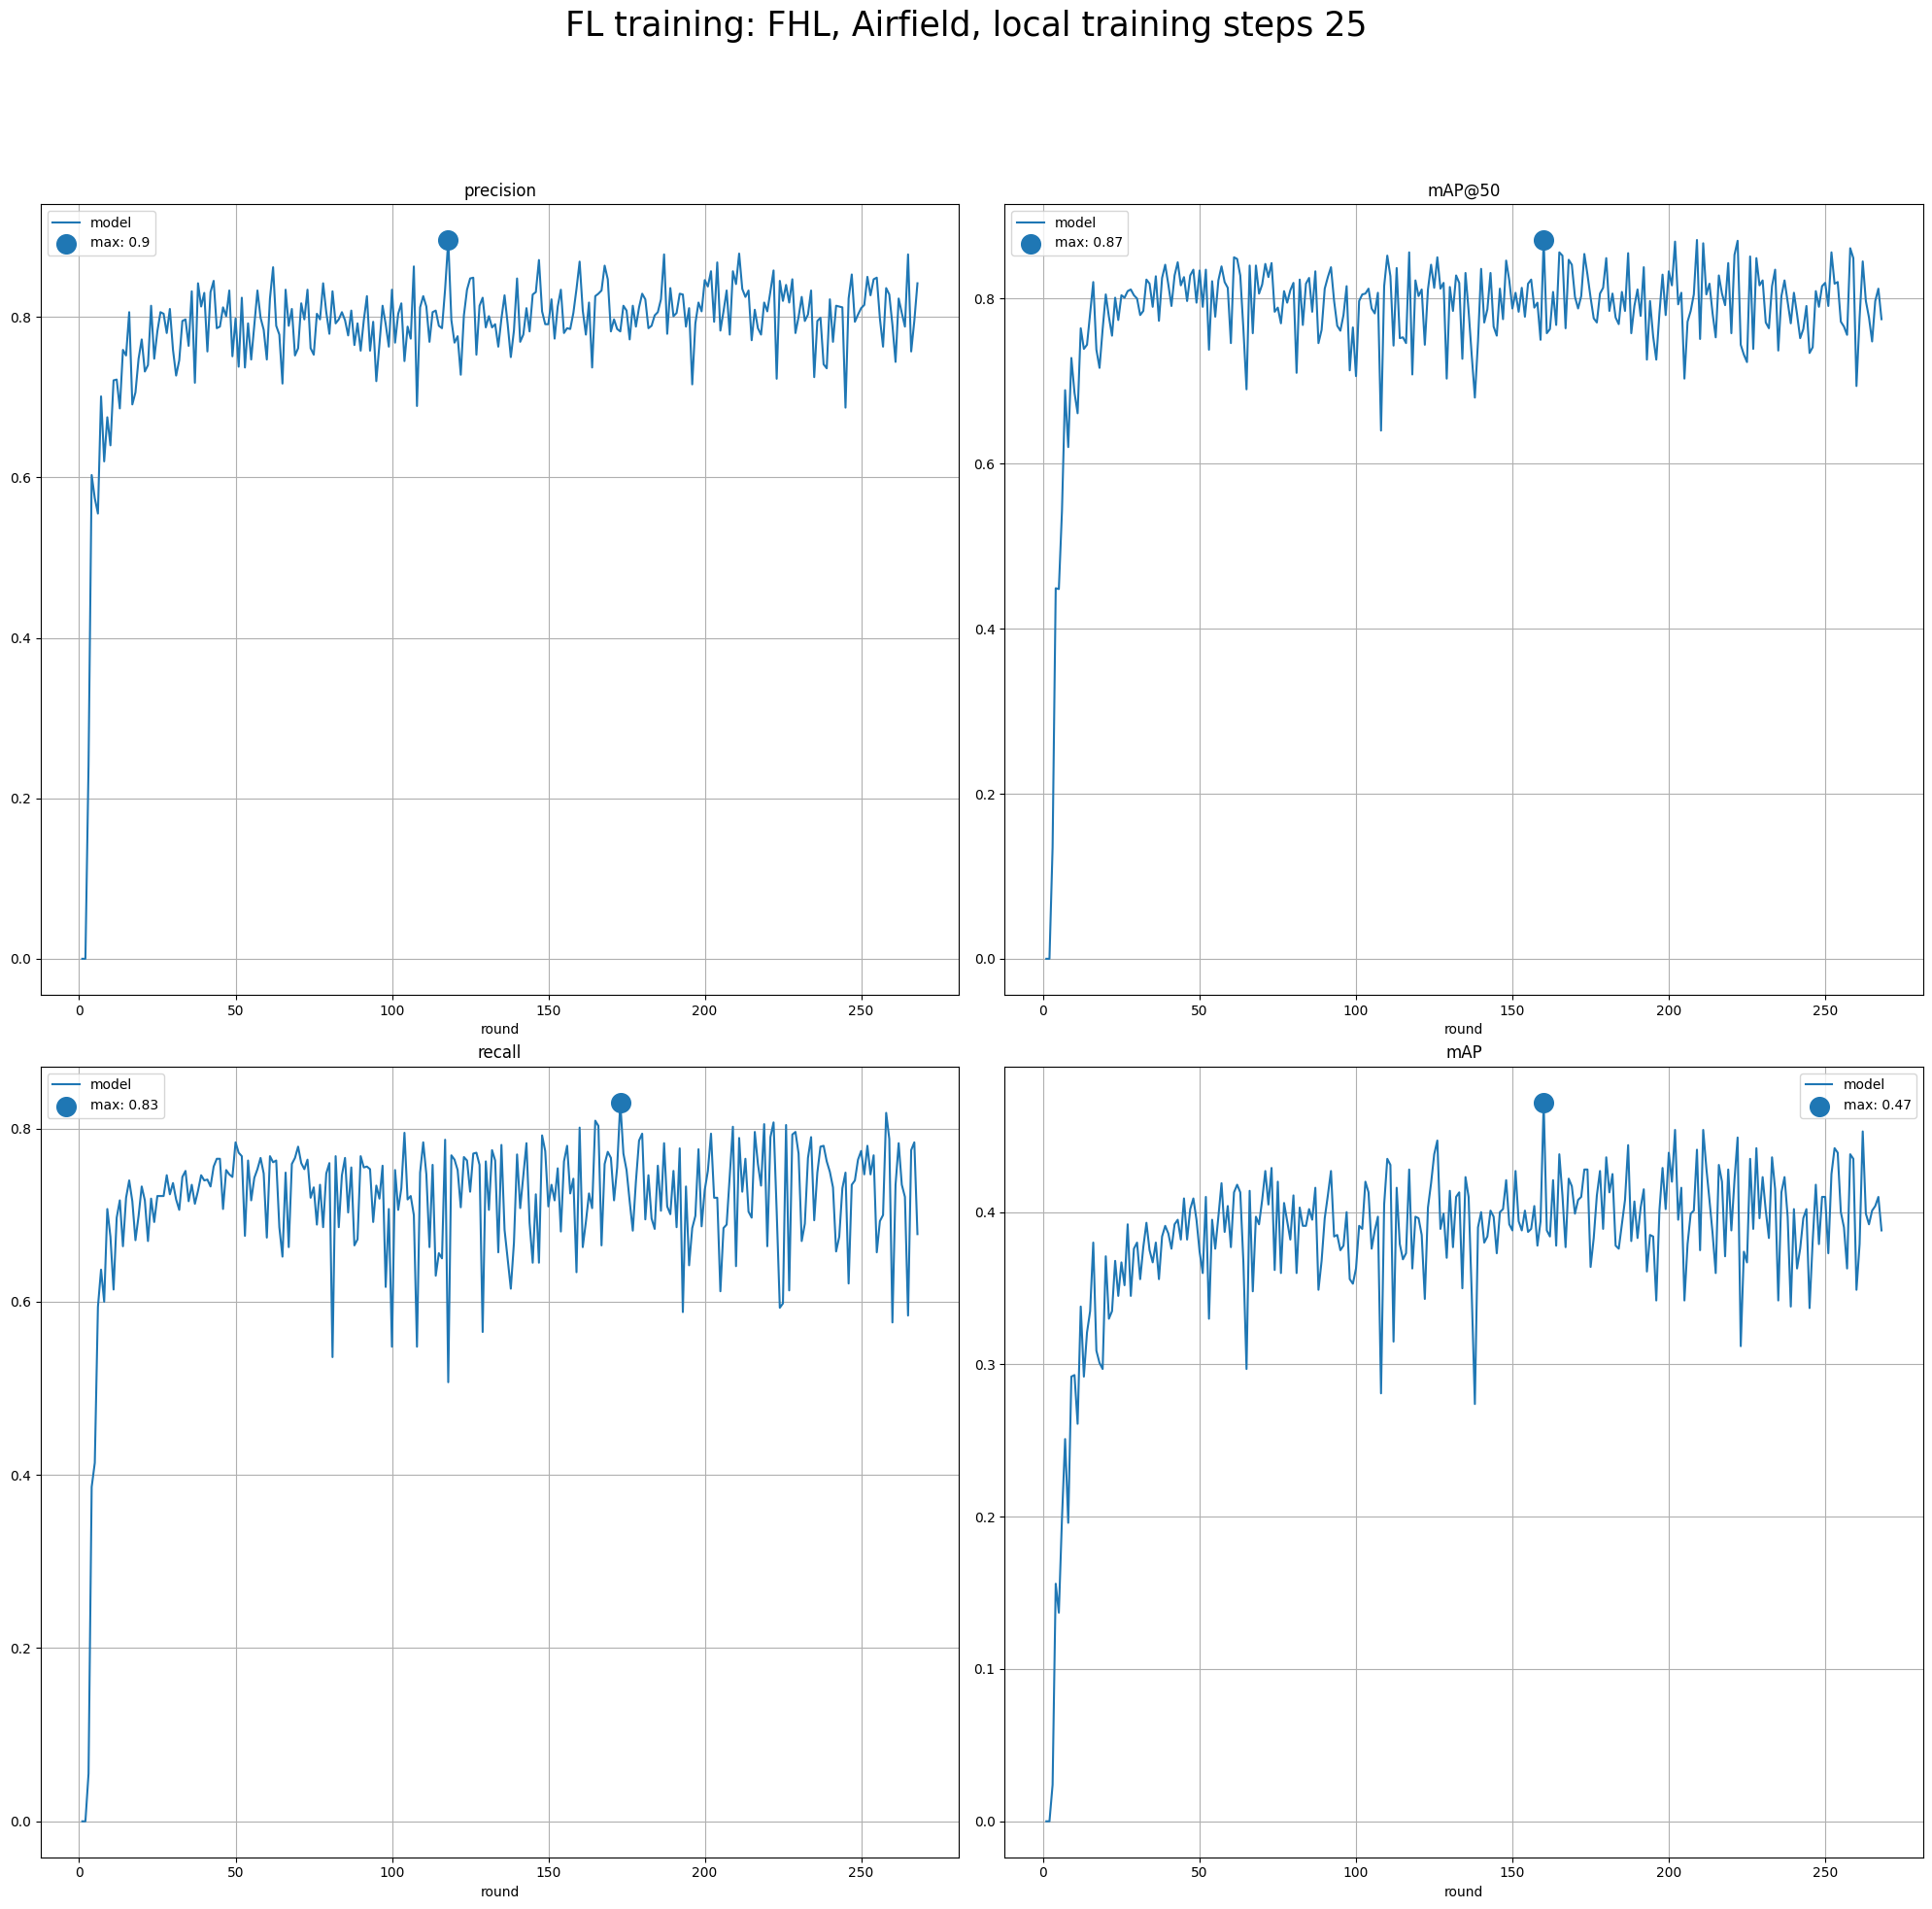

In [147]:
import pandas as pd
from matplotlib import pylab as plt
import os
import numpy as np
res_folder = 'results'
exp_name = 'lean_ml_complete_4juni_p0.5'
#exp_name = 'lean_ml_complete_1juni'
exp_name = 'lean_ml_airfield'
exp_name = 'lean_ml_bellingham'
exp_name = 'lean_ml_carnation'

experiment_name = os.path.join(res_folder, exp_name)
clients = os.listdir(experiment_name)
#clients = [client for client in clients if ( len(client.split("_"))>2 and client.split("_")[2] == "ema")]

print("clients: " )
for client in clients:
    print("   ", client)
print("")

s=0
e= None

f, ax = plt.subplots(2,2, figsize=(20,20))
results_ = {}
results_['precision'] = []
results_['recall'] = []
results_['mAP@50'] = []
results_['mAP'] = []
for client in clients:
    #print("client: ", client)
    csv_path = os.path.join(experiment_name, client)
    if client.endswith("_step.csv"):

        step_data = pd.read_csv(csv_path)
       
        name = client.split("_")[1]

        ax[0,0].plot(step_data['round'][s:e],step_data['precision'][s:e], label = name)
        results_['precision'] += [np.array(step_data['precision'])]
        max_ind = np.argmax(step_data['precision'][s:e])
        ax[0,0].scatter(step_data['round'][s:e][max_ind], [step_data['precision'][s:e][max_ind]], s=200, label='max: '+str(np.round(step_data['precision'][s:e][max_ind],2)))

        ax[1,0].plot(step_data['round'][s:e],step_data['recall'][s:e], label = name)
        results_['recall'] += [np.array(step_data['recall'])]
        max_ind = np.argmax(step_data['recall'][s:e])
        ax[1,0].scatter(step_data['round'][s:e][max_ind], [step_data['recall'][s:e][max_ind]], s=200, label='max: '+str(np.round(step_data['recall'][s:e][max_ind],2)))

        

        ax[0,1].plot(step_data['round'][s:e],step_data['mAP@50'][s:e], label = name)
        results_['mAP@50'] += [np.array(step_data['mAP@50'])]
        max_ind = np.argmax(step_data['mAP@50'][s:e])
        ax[0,1].scatter(step_data['round'][s:e][max_ind], [step_data['mAP@50'][s:e][max_ind]], s=200, label='max: '+str(np.round(step_data['mAP@50'][s:e][max_ind],2)))

        ax[1,1].plot(step_data['round'][s:e],step_data['mAP'][s:e], label = name)
        results_['mAP'] += [np.array(step_data['mAP'])]
        max_ind = np.argmax(step_data['mAP'][s:e])
        ax[1,1].scatter(step_data['round'][s:e][max_ind], [step_data['mAP'][s:e][max_ind]], s=200, label='max: '+str(np.round(step_data['mAP'][s:e][max_ind],2)))




ax[0,0].set_title('precision')
ax[1,0].set_title('recall')
ax[0,1].set_title('mAP@50')
ax[1,1].set_title('mAP')

#last_ind = min(len(results_['precision'][0],len(results_['precision'][1])))
#print("shape: ", np.array(results_['precision']).shape)
#print("shape: ", np.mean(np.array(results_['precision']).shape))
#ax[0,0].plot(step_data['round'][s:e],np.mean(np.array(results_['precision']),0)[s:e], label = 'mean',c='r')

for a_ in ax:
    for a in a_:
        a.grid()
        a.legend()
        a.set_xlabel('round')

#ax[0,0].set_ylim(0.6,1)
#ax[1,0].set_ylim(0.6,1)
#ax[0,1].set_ylim(0.6,1)
#ax[1,1].set_ylim(0.3,1)

#ax[0,0].set_ylim(0.,0.1)
#ax[1,0].set_ylim(0.,0.1)
#ax[0,1].set_ylim(0.,.1)
#ax[1,1].set_ylim(0.,0.1)

plt.suptitle("FL training: FHL, Airfield, local training steps 25",fontsize=25)
plt.tight_layout()  # Avoids overlapping
plt.subplots_adjust(top=0.88)  # Adjust to make space for the suptitle
plt.savefig('centralized_emap05.png')

In [65]:


def get_results(clients,experiment_name):
    results = {}
    metrics = ['precision', 'recall', 'mAP', 'mAP@50']
    
    for client in clients:
        csv_path = os.path.join(experiment_name, client)
        step_data = pd.read_csv(csv_path)
        
        name = client.split("_")[1]
        results[name] = {}
        for metric in metrics:  
            results[name][metric] = np.array(step_data[metric])
    m = np.min([len(results[cr]['recall']) for cr in results])
    print("m: ", m)
    mean_res = {}
    for metric in metrics: 
       
        mean_res[metric] = np.mean(np.array([results[client_res][metric][:m] for client_res in results]),0)
    results['mean'] = mean_res
    return results
        

In [131]:
res_folder = 'results'
exp_name = 'lean_ml_complete_4juni_p0.5'
#exp_name = 'lean_ml_complete_1juni'

experiment_name = os.path.join(res_folder, exp_name)
clients = os.listdir(experiment_name)
clients_model = [client for client in clients if ( len(client.split("_"))>2 and client.split("_")[2] == "model")]
clients_ema = [client for client in clients if ( len(client.split("_"))>2 and client.split("_")[2] == "ema")]



results_model = get_results(clients_model,experiment_name)
results_ema = get_results(clients_ema,experiment_name)



m:  274
m:  274


In [133]:
results_ema['mean']['mAP@50'][50:60]

array([0.628 , 0.6232, 0.6068, 0.6441, 0.7141, 0.6662, 0.6284, 0.6153,
       0.6307, 0.623 ])

In [6]:
len(results_ema['mean']['mAP'])

274

metric:  precision , best epoch:  26
metric:  recall , best epoch:  122
metric:  mAP@50 , best epoch:  54
metric:  mAP , best epoch:  54


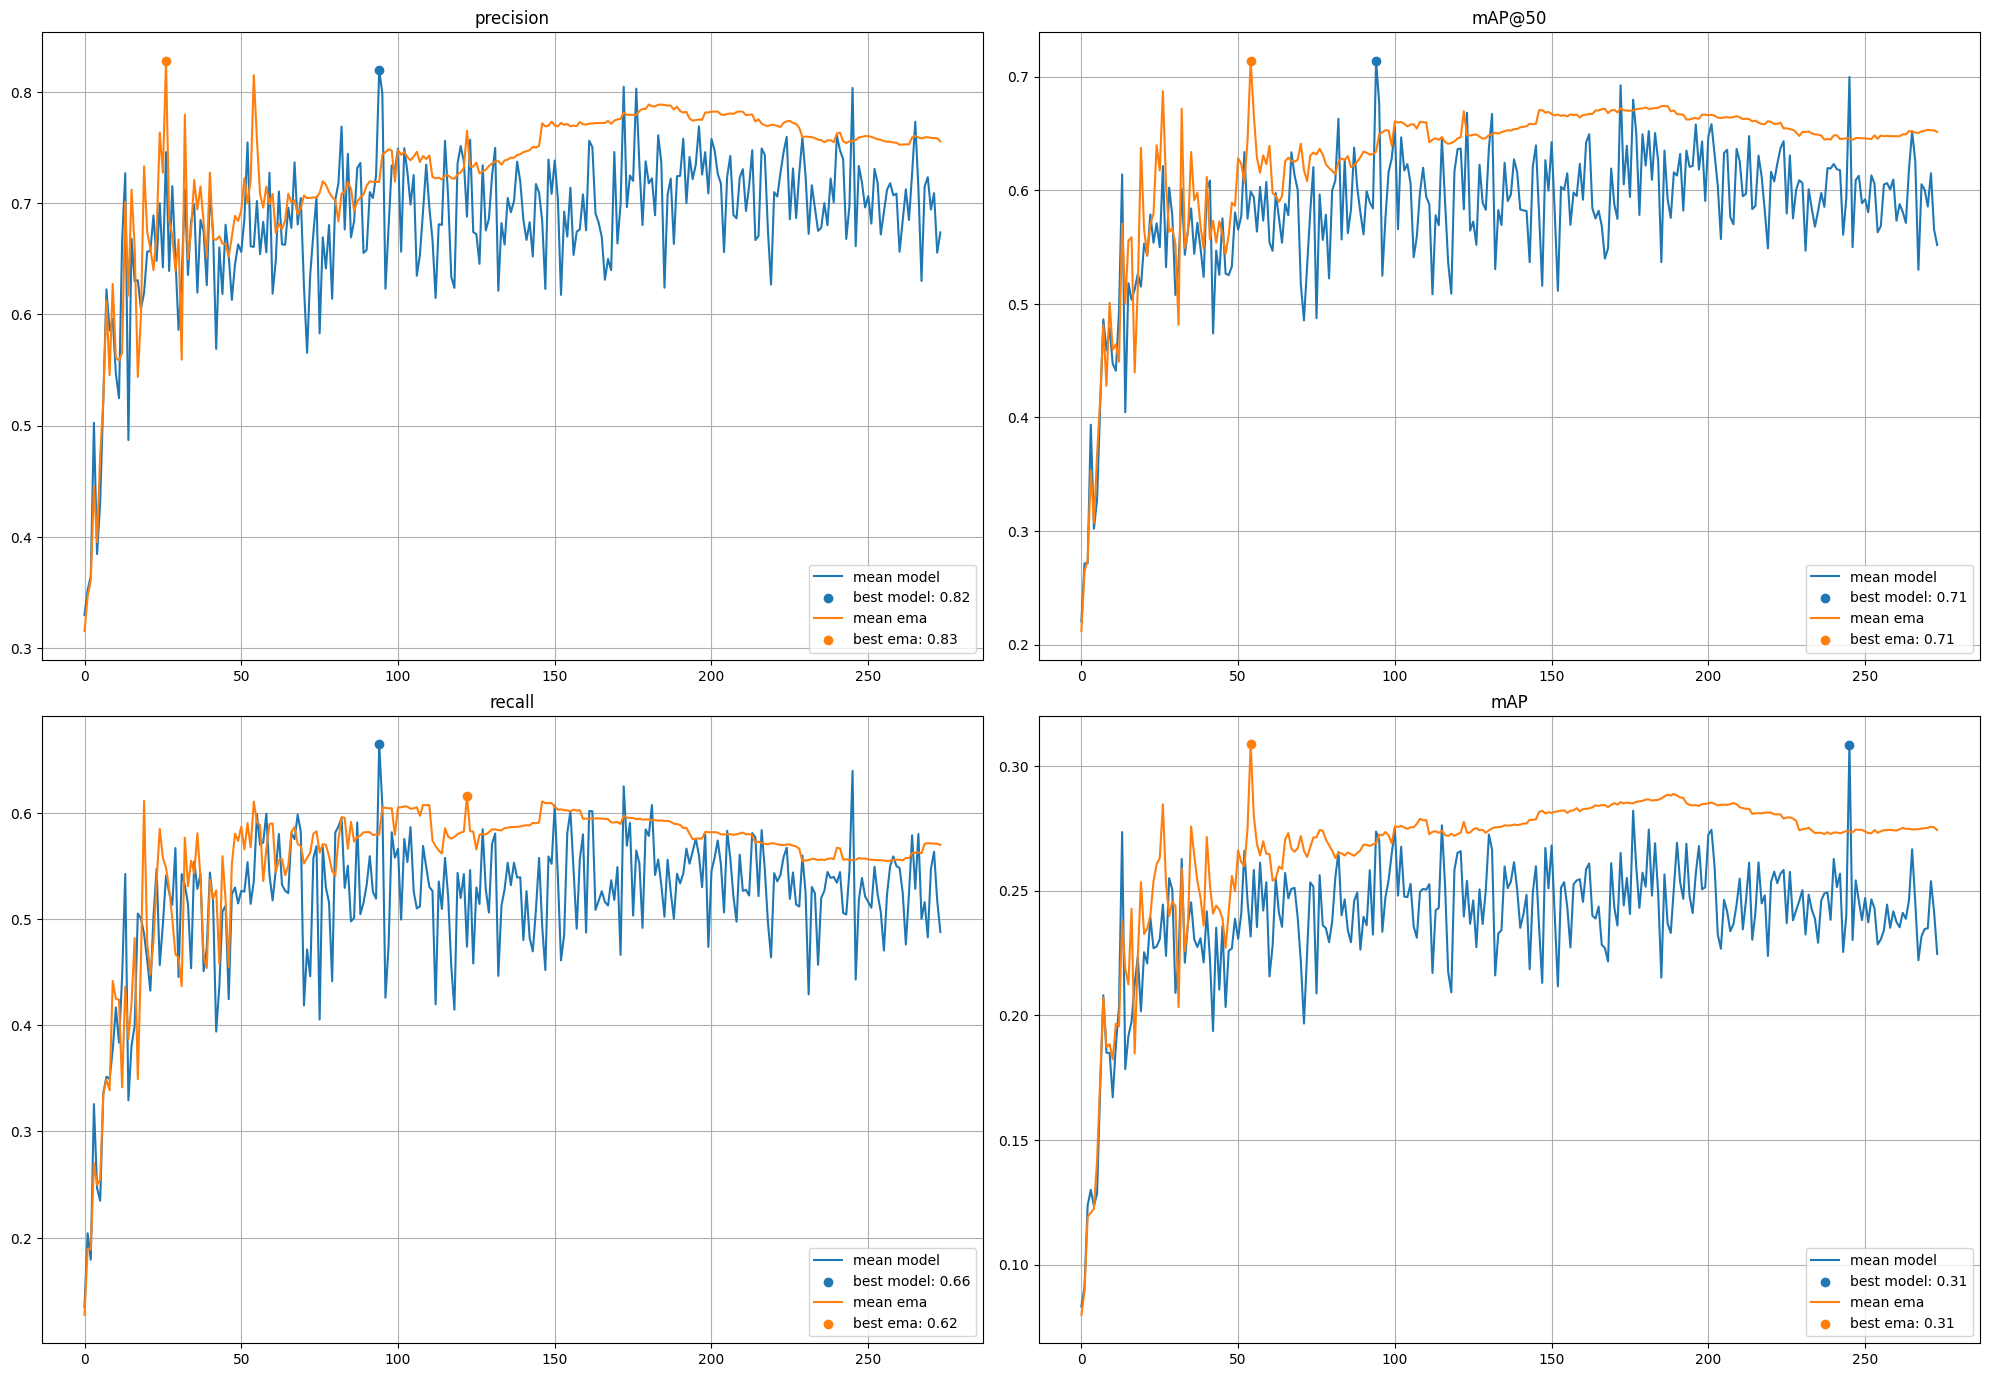

In [113]:
f2, ax2 = plt.subplots(2, 2, figsize=(20, 15))
metrics = ['precision', 'recall', 'mAP@50', 'mAP']
for metric,ax_ in zip(metrics,[ax2[0,0], ax2[1,0], ax2[0,1], ax2[1,1]]):

    ax_.plot(results_model['mean'][metric], label = 'mean model')
    bestmodelepoch = np.argmax(results_model['mean'][metric])
    
    ax_.scatter(bestmodelepoch, results_model['mean'][metric][bestmodelepoch], label="best model: "+ str(np.round(results_model['mean'][metric][bestmodelepoch],2)))
    ax_.plot(results_ema['mean'][metric], label = 'mean ema')
    bestemaepoch = np.argmax(results_ema['mean'][metric])
    print("metric: ", metric, ", best epoch: ", bestemaepoch)
    ax_.scatter(bestemaepoch, results_ema['mean'][metric][bestemaepoch], label="best ema: "+ str(np.round(results_ema['mean'][metric][bestemaepoch],2)))
    ax_.legend()
    ax_.set_title(metric)
    ax_.grid()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('rawmodel-emamodel.png')


In [86]:
csv_path = "results/lean_ml_complete_4juni_p0.5/sub_mapp/dataset_Airfield_ema_step_tr_0.001.csv"
#csv_path = os.path.join(experiment_name, client)
step_data = pd.read_csv(csv_path)

In [97]:
np.where(step_data["round"] == 380)[0][0].item()

380 in list(step_data["round"])

True

In [118]:
def get_results_(clients,experiment_name,epoch):
    results = {}
    metrics = ['precision', 'recall', 'mAP', 'mAP@50']
    
    for client in clients:
        csv_path = os.path.join(experiment_name, client)
        step_data = pd.read_csv(csv_path)
        
        if epoch in list(step_data["round"]):
            epoch_ind = np.where(step_data["round"] == epoch)[0][0].item()
            name = client.split("_")[1]
            treshold = client.split("_")[5][:-4]
            if treshold not in results.keys():
                results[treshold] = {}
            results[treshold][name] = {}
            for metric in metrics:  
                results[treshold][name][metric] = np.array(step_data[metric])[epoch_ind]
        
    
    for treshold in results:
        mean_res = {}
        for metric in metrics: 
            
            mean_res[metric] = np.mean(np.array([results[treshold][client_res][metric] for client_res in results[treshold]]),0)
            

        results[treshold]['mean'] = mean_res
    return results
        

In [136]:
res_folder = 'results'
exp_name = 'lean_ml_complete_4juni_p0.5'
#exp_name = 'lean_ml_complete_1juni'

experiment_name = os.path.join(res_folder, exp_name, "sub_mapp")
clients = os.listdir(experiment_name)
clients_ema = [client for client in clients if ( len(client.split("_"))>2 and client.split("_")[2] == "ema")]


results_ema = get_results_(clients_ema,experiment_name, 341)

treshold:  0.6400000000000001
treshold:  0.55
treshold:  0.6400000000000001
treshold:  0.6400000000000001


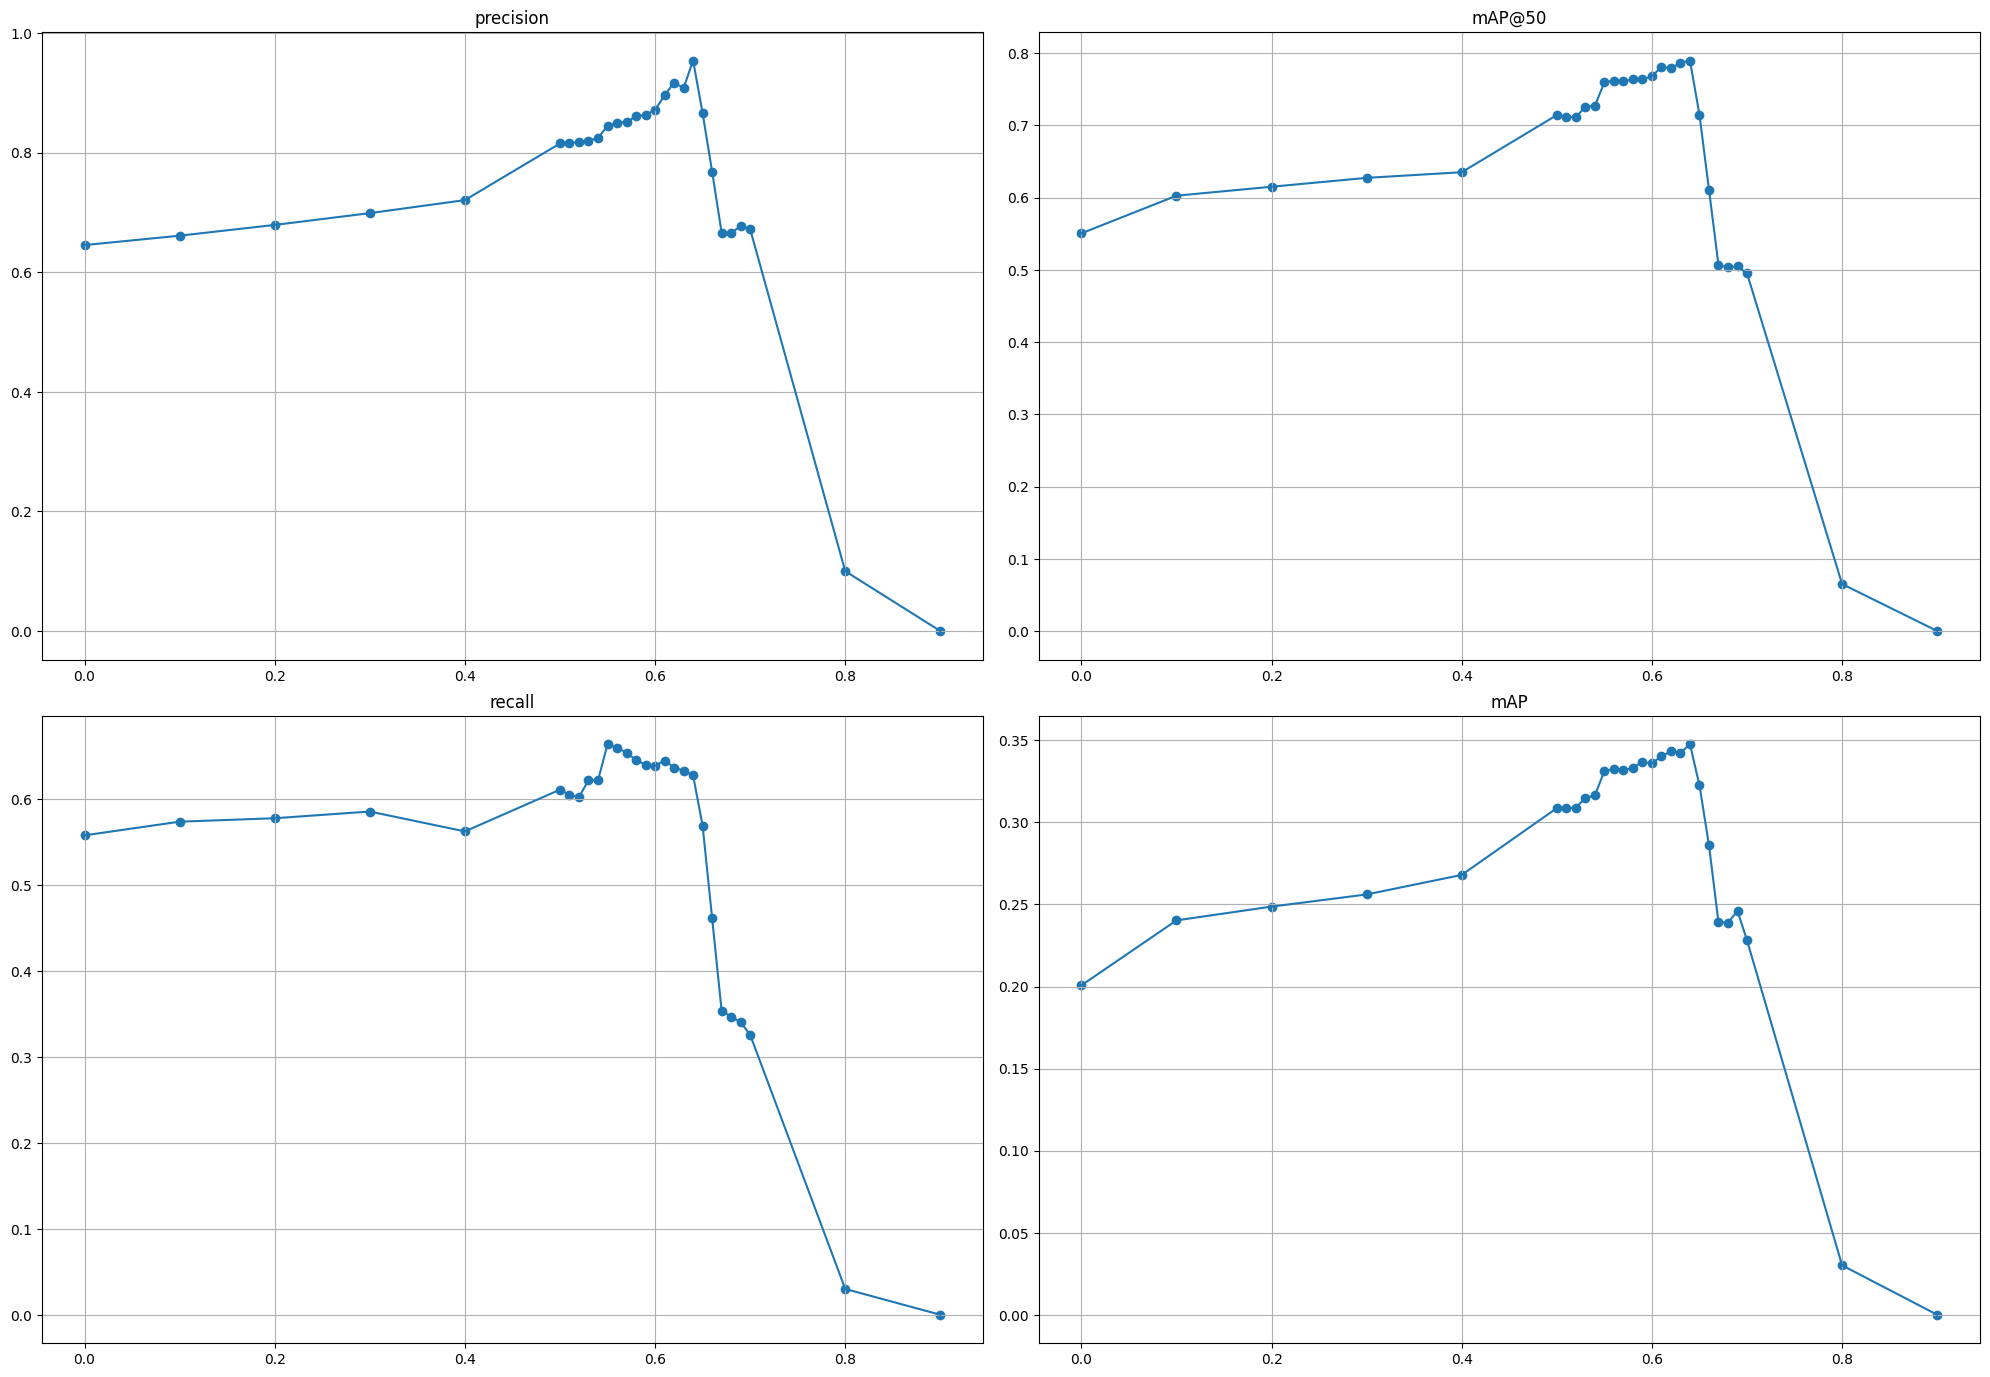

In [138]:
tresholds = np.sort([float(treshold) for treshold in list(results_ema.keys())])
f2, ax2 = plt.subplots(2, 2, figsize=(20, 15))
metrics = ['precision', 'recall', 'mAP@50', 'mAP']
for metric,ax_ in zip(metrics,[ax2[0,0], ax2[1,0], ax2[0,1], ax2[1,1]]):

   
    ax_.plot(tresholds, [results_ema[str(treshold)]["mean"][metric] for treshold in tresholds])
    ax_.scatter(tresholds, [results_ema[str(treshold)]["mean"][metric] for treshold in tresholds])
    ind = np.argmax([results_ema[str(treshold)]["mean"][metric] for treshold in tresholds])
    print("treshold: ",tresholds[ind])
    #bestemaepoch = np.argmax(results_ema['mean'][metric])
    #ax_.scatter(bestemaepoch, results_ema['mean'][metric][bestemaepoch], label="best ema: "+ str(np.round(results_ema['mean'][metric][bestemaepoch],2)))
    #ax_.legend()
    ax_.set_title(metric)
    ax_.grid()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
#plt.savefig('rawmodel-emamodel.png')